In [1]:
import matplotlib.pyplot as plt
import numpy as np


Text(0, 0.5, 'Probabilities')

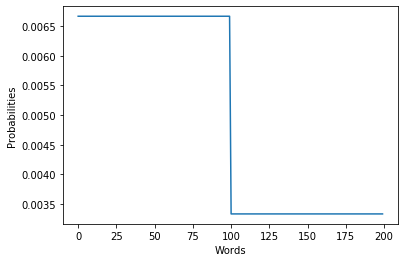

In [32]:
n=200
lol = np.hstack([np.ones(n//2), np.ones(n//2)*0.5])
plt.plot(lol/lol.sum())
plt.xlabel('Words')
plt.ylabel('Probabilities')

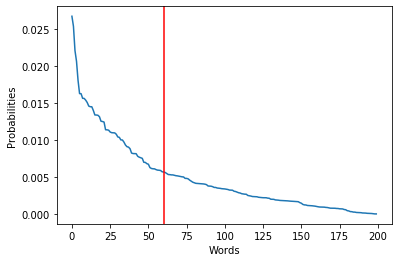

In [46]:
test = np.random.exponential(1, n)
test = -np.sort(-test)
plt.plot(test/ test.sum())
plt.axvline(60, c='red')
plt.xlabel('Words')
plt.ylabel('Probabilities')
plt.gcf().savefig('ImageOutputs/ExpDropOff.png', dpi=250)

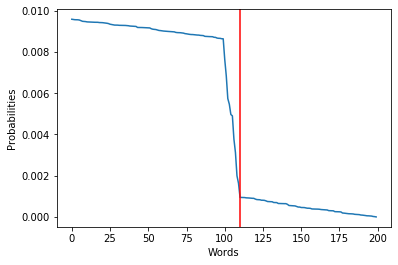

In [49]:
test = np.hstack([np.random.uniform(0.9,1, 100), np.random.uniform(0,0.8, 10), np.random.uniform(0,0.1, 90)])
test = -np.sort(-test)
plt.plot(test/ test.sum())
plt.xlabel('Words')
plt.axvline(110, c='red')
plt.ylabel('Probabilities')
plt.gcf().savefig('ImageOutputs/UniformDropOff.png', dpi=250)

# what does N have to be to have stat sig difference between the means of two coins? 


# not only is it that you only see the event you want to infrequently but if you dont see it they you get a random reading one way or the other. 


number of tosses per sim is: 10
number of times a is larger than b ::: 0.32686
number of times b is larger than a ::: 0.50042
-------
number of tosses per sim is: 50
number of times a is larger than b ::: 0.27014
number of times b is larger than a ::: 0.66032
-------
number of tosses per sim is: 100
number of times a is larger than b ::: 0.21688
number of times b is larger than a ::: 0.74026
-------
number of tosses per sim is: 200
number of times a is larger than b ::: 0.14392
number of times b is larger than a ::: 0.83292
-------
number of tosses per sim is: 500
number of times a is larger than b ::: 0.05256
number of times b is larger than a ::: 0.9392
-------
number of tosses per sim is: 1000
number of times a is larger than b ::: 0.01162
number of times b is larger than a ::: 0.9874
-------
number of tosses per sim is: 1500
number of times a is larger than b ::: 0.00236
number of times b is larger than a ::: 0.99716
-------
number of tosses per sim is: 2000
number of times a is la

(array([8.0000e+00, 1.3300e+02, 1.3270e+03, 6.2820e+03, 1.3700e+04,
        1.6427e+04, 9.2060e+03, 2.5000e+03, 3.8500e+02, 3.2000e+01]),
 array([1138. , 1159.6, 1181.2, 1202.8, 1224.4, 1246. , 1267.6, 1289.2,
        1310.8, 1332.4, 1354. ]),
 <a list of 10 Patch objects>)

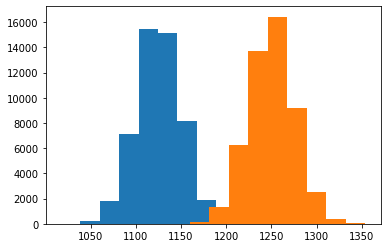

In [56]:
tosses = [10, 50, 100, 200, 500, 1000, 1500, 2000, 2500]
n_sims = 50000

a_prob = 0.55
b_prob = 0.50
res = []

for t in tosses: 
    print('number of tosses per sim is:', t)
    a = (np.random.uniform(0,1,(n_sims, t))>a_prob).sum(axis=1) 
    # given the signal we want
    b = (np.random.uniform(0,1,(n_sims, t))>b_prob).sum(axis=1)
    res.append(np.array([(a>b).sum(), (a<b).sum(), (a==b).sum()] )  )
    print('number of times a is larger than b :::', (a>b).sum() / n_sims)
    print('number of times b is larger than a :::', (a<b).sum() / n_sims)
    print('-------')

res = np.asarray(res) / n_sims

Text(0, 0.5, 'Probability')

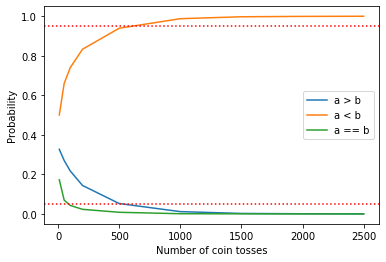

In [58]:
plt.plot(tosses,res[:,0], label = 'a > b' )
plt.plot(tosses,res[:,1], label = 'a < b' )
plt.plot(tosses,res[:,2], label = 'a == b' )
plt.axhline(0.05, color='red', linestyle=':')
plt.axhline(0.95, color='red', linestyle=':')
plt.legend()
plt.xlabel('Number of coin tosses')
plt.ylabel('Probability')
#plt.gcf().savefig('ImageOutputs/significanceTesting', dpi=250)

In [111]:
noise_sig

array([ 7,  7,  7,  6,  8,  8,  8,  6,  6,  7,  8,  6,  6,  6,  7,  5,  7,
        8,  7,  5,  6,  8,  8,  8,  7,  7,  6,  8, 10,  7,  9,  8,  5,  4,
        7,  7,  8,  4,  7,  8,  4,  8,  7,  5,  6,  8,  7,  7,  6,  5])

In [110]:
np.random.binomial( noise_sig, 0.5)

array([4, 5, 5, 4, 4, 4, 3, 4, 4, 4, 4, 1, 2, 1, 4, 2, 4, 4, 2, 4, 2, 6,
       4, 5, 3, 4, 4, 5, 5, 4, 5, 4, 3, 3, 3, 2, 5, 2, 0, 5, 3, 6, 6, 2,
       4, 1, 5, 4, 2, 1])

In [134]:
tosses = [10, 100, 200, 500,1000, 1500, 2000, 2500]
n_sims = 50000

a_prob = 0.75
#b_prob = 0.90 # higher prob of being bad
b_probs = [0.78, 0.8, 0.85, 0.9, 0.92, 0.94]
diff_prob_res = []
for b_prob in b_probs:
    res = []

    for t in tosses: 
        print('number of tosses per sim is:', t)
        a = np.random.uniform(0,1,(n_sims, t))>a_prob 
        b = np.random.uniform(0,1,(n_sims, t))>b_prob
        noise_sig = (a==b).sum(axis=1) # both bad or both good. then get noise 
        noise_a = np.random.binomial( noise_sig, 0.5)
        a_worse = (a>b).sum(axis=1) + noise_a
        b_worse = (a<b ).sum(axis=1) + (noise_sig - noise_a) # signal when they are diff from each other. 

        res.append(np.array([(a_worse > b_worse).sum(), (a_worse < b_worse).sum(), (a_worse == b_worse).sum()] )/ (n_sims)  )
        print('number of times a is larger than b :::', (a_worse > b_worse).sum() / n_sims )
        print('number of times a is less than b :::', (a_worse < b_worse).sum() / n_sims)
        print('number of times a is equal to b :::', (a_worse == b_worse).sum() / n_sims)
        print('-------')
    res = np.asarray(res)
    diff_prob_res.append(res)

number of tosses per sim is: 10
number of times a is larger than b ::: 0.41382
number of times a is less than b ::: 0.33782
number of times a is equal to b ::: 0.24836
-------
number of tosses per sim is: 100
number of times a is larger than b ::: 0.57718
number of times a is less than b ::: 0.3454
number of times a is equal to b ::: 0.07742
-------
number of tosses per sim is: 200
number of times a is larger than b ::: 0.63628
number of times a is less than b ::: 0.31186
number of times a is equal to b ::: 0.05186
-------
number of tosses per sim is: 500
number of times a is larger than b ::: 0.73286
number of times a is less than b ::: 0.23918
number of times a is equal to b ::: 0.02796
-------
number of tosses per sim is: 1000
number of times a is larger than b ::: 0.81858
number of times a is less than b ::: 0.16486
number of times a is equal to b ::: 0.01656
-------
number of tosses per sim is: 1500
number of times a is larger than b ::: 0.87326
number of times a is less than b ::

0.78


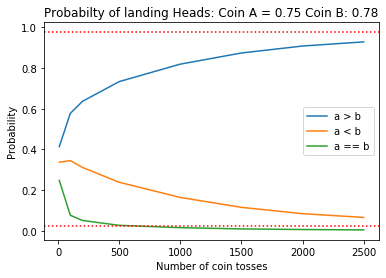

0.8


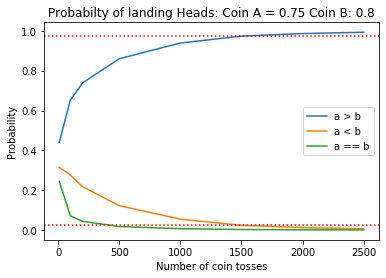

0.85


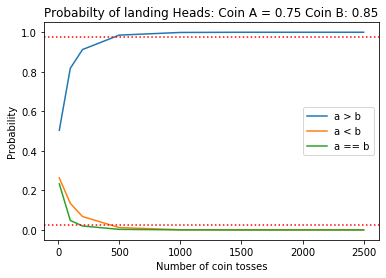

0.9


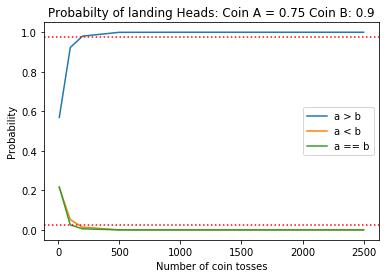

0.92


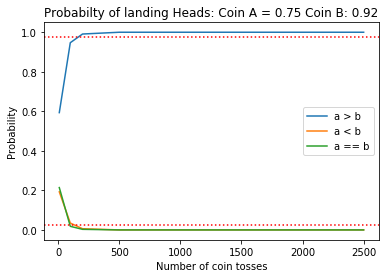

0.94


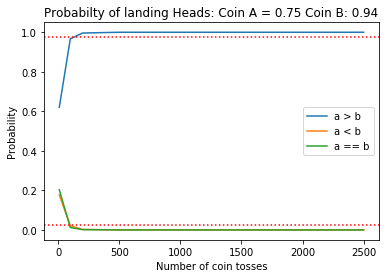

In [135]:
for ind, res in enumerate(diff_prob_res):
    print(b_probs[ind])
    plt.plot(tosses,res[:,0], label = 'a > b' )
    plt.plot(tosses,res[:,1], label = 'a < b' )
    plt.plot(tosses,res[:,2], label = 'a == b' )
    plt.axhline(0.025, color='red', linestyle=':')
    plt.axhline(0.975, color='red', linestyle=':')
    plt.legend()
    plt.xlabel('Number of coin tosses')
    plt.ylabel('Probability')
    plt.title('Probabilty of landing Heads: Coin A = '+str(a_prob) + ' Coin B: '+ str(b_probs[ind]))
    plt.gcf().savefig('ImageOutputs/significanceTesting-BProb'+str(b_probs[ind])+'.png', dpi=250)
    plt.show()
    

In [77]:
tosses=10000
a_prob = 0.99
b_prob = 0.90
rand_nums = np.random.uniform(0,1,tosses) 
real = (rand_nums > (a_prob*b_prob)).sum() # get a real signal 
fake = (np.random.uniform(0,1, (tosses-real)) > 0.5).sum() # get this many fake, uniform signals

(real+fake) / tosses

0.556